# CITS4402 Project: Normalisation Technique Ablation Study

### Group Members:

- Jalil Inayat-Hussain (22751096)
- Felix Mavrodoglu (23720305)
- Reilly Evans (23615971)

In [1]:
# Import project functions
from projectFunctions import formatDataset

# Get the features from the data with default parameters
baseTrainPathes, baseTrainFeatures, baseTrainLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, randomSeed = 48
)
baseTestPathes, baseTestFeatures, baseTestLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, randomSeed = 48
)

In [2]:
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Create and train SVM classifier
baseSVM = LinearSVC(random_state = 48)
baseSVM.fit(baseTrainFeatures, baseTrainLabels)

# Get accuracy, precision and recall of SVM on test set
baseTestPredicts = cross_val_predict(
    baseSVM, baseTestFeatures, baseTestLabels, cv = 3
)
baseTestAccuracy = baseSVM.score(baseTestFeatures, baseTestLabels) 
baseTestValidAccuracy = cross_val_score(
    baseSVM, baseTestFeatures, baseTestLabels, cv = 3, scoring="accuracy"
).mean()
print('Default HOG Parameter Scores:')
print(f'Accuracy:', baseTestAccuracy)
print(f'Cross-validated Accuracy:', baseTestValidAccuracy)
baseTestPrecision = precision_score(baseTestLabels, baseTestPredicts)
print(f'Precision:', baseTestPrecision)
baseTestRecall = recall_score(baseTestLabels, baseTestPredicts)
print(f'Recall:', baseTestRecall)
baseTestFOne = f1_score(baseTestLabels, baseTestPredicts)
print(f'F1 Score:', baseTestFOne)

Default HOG Parameter Scores:
Accuracy: 1.0
Cross-validated Accuracy: 0.9020032224707212
Precision: 0.8736059479553904
Recall: 0.94
F1 Score: 0.905587668593449


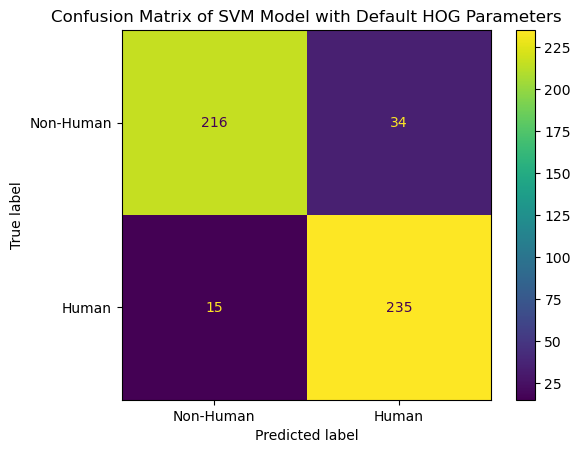

In [3]:
# Import confusion matrix and matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    baseTestLabels, baseTestPredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with Default HOG Parameters')
plt.show()